### K-NN from Scratch:
In this jupyter notebook, KNN(K-Nearest Neighbours) classifier is developed from scratch:
The script is  tested with the Cifar-10 dataset: Cifar10 Dataset(Python version), Link: https://www.cs.toronto.edu/~kriz/cifar.html <br>
Results: <br>
&emsp; &emsp; &emsp; &emsp;   With out data standardized: L1 (38.59%) and L2 (35.39%)<br>
&emsp; &emsp; &emsp; &emsp;   With data standardized: l1 (45.46%) and l2 ( 42.26%)<br>

In [1]:
# Import Packages
import pickle
import numpy as np
import time
import glob
import matplotlib.pyplot as plt
from random import random
from scipy import stats
from scipy.stats import zscore
from scipy.spatial import distance


In [2]:
# Define function to read file
def unpickle(file):
    with open(file, 'rb') as f:
        dict_val = pickle.load(f, encoding="latin1")
    return dict_val


In [3]:
# Define accuracy function
def class_acc(x, y):
    """
    Find accuracy percentage of given predicted and true labels.
    Parameters
    ----------
    x (ndarray): True label
    y (ndarray): Predicted label
    Return
    ------
    accuracy: Accuracy percentage
    """

    if len(x) == len(y):
        accuracy = (np.sum(x == y) / len(x)) * 100
        return np.round(accuracy, decimals=2)
    else:
        print('Predicted and Ground truth must have same length')


In [4]:
# Define random classifier function
def cifar10_classifier_random(x, label):
    """
    parameters:
    ----------
    x (ndarray): Test dataset
    label(int): No. of labels/Class
    Return:
    --------
    labels (1d array): Predicted labels
    """
    labels = np.array(range(label))  # classes

    # Random guess with uniform distribution of each class
    random_labels = np.random.choice(labels, len(x))
    return random_labels


In [5]:
# Define class for calculating distance metric
class DistanceMetric:
    """
    Calculate distance metrics: 1.Euclidean(L2) and 2.Manhattan(L1)
    Parameter:
     x (nd array):  vector/matrix
     y (nd array): vector/matrix

    Return:
     distance (nd array):  Euclidean or Manhattan distance
    """

    # Euclidean distance(L2)
    def euclidean_distance(self, x, y):

        # vector to vector(1d to 1d)
        if x.ndim == 1 and y.ndim == 1:
            eud_dist = np.sum((x - y) ** 2)
            return eud_dist  # 1d ouput

        # matrix to matrix
        elif x.ndim > 1 and y.ndim > 1:
            if x.shape[0] == 1:  # Single data
                eud_dist = np.sum(((x - y) ** 2), axis=1)
                eud_dist = np.expand_dims(eud_dist, axis=0)  # Change to 2d
                return eud_dist  # 2d ouput

            else:
                x = x[:, None]  # Change to 3d
                eud_dist = np.sum(((x - y) ** 2), axis=2)
                return eud_dist  # 2d ouput

        # vector to matrix(1d to 2d)
        else:
            eud_dist = np.sum(((x - y) ** 2), axis=1)
            return eud_dist  # 1d ouput

    # Manhattan distance(L1)
    def manhattan_dist(self, x, y):
        # vector to vector(1d to 1d)
        if x.ndim == 1 and y.ndim == 1:
            man_dist = np.sum(np.abs(x - y))
            return man_dist  # 1d ouput

        # matrix to matrix(2d to 2d)
        elif x.ndim > 1 and y.ndim > 1:
            if x.shape[0] == 1:  # Single data
                man_dist = np.sum(np.abs(x - y), axis=1)
                man_dist = np.expand_dims(man_dist, axis=0)  # Change to 2d
                return man_dist  # 2d output

            else:
                x = x[:, None]  # Change to 3d
                print(x)
                man_dist = np.sum(np.abs(x - y), axis=2)

                return man_dist  # 2d output

        # vector to matrix(1d to 2d)
        else:
            man_dist = np.sum(np.abs(x - y), axis=1)
            return man_dist  # 1d ouput


In [7]:
#Define K-Nearest Neighbors Classifier
class KnnClassifier:
    """K-Nearest Neighbors Classifier"""

    def __init__(self, metric='euclidean', k=1):
        self.k = k
        self.metric = metric

    # Fit data for training
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    # Prediction
    def prediction(self, x_test):

        # Change to 2d
        if x_test.ndim == 1:
            x_test = np.expand_dims(x_test, axis=0)

        predicted_label = np.zeros(len(x_test), dtype=int)  # store prediction classes

        # loop through each test data
        for i, test in enumerate(x_test):
            # Distance Metric
            if self.metric == 'euclidean':
                dist = DistanceMetric.euclidean_distance(self, test, self.x_train)  # Distance
            else:
                dist = DistanceMetric.manhattan_dist(self, test, self.x_train)  # Distance

            k_index = np.argsort(dist)[:self.k]  # index of k-nearest neighbors
            k_neighbors = self.y_train[k_index]  # k-nearest neighbors
            hig_count_neighbor = stats.mode(k_neighbors).mode  # get neighbors with max count
            predicted_label[i] = hig_count_neighbor

        return predicted_label

Test data shape:  (10000, 3072)
Test Labels shape:  (10000,)

Train data shape:  (50000, 3072)
Train Labels shape:  (50000,)



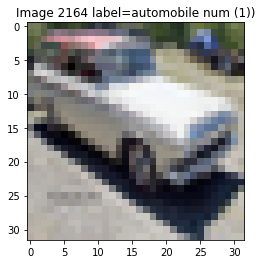

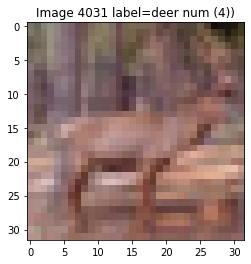

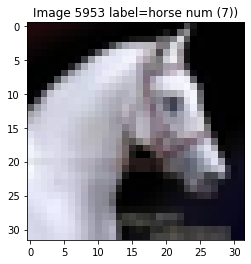

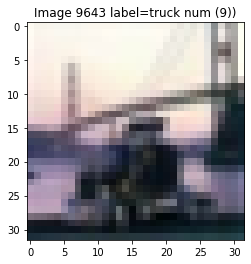

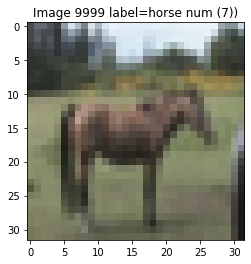

Random Classifier Accuracy: 9.95% 

classifier accuracy:  38.59%
Time taken:  33024 seconds

Accuracy:  42.26%
Time taken:  2144 seconds


In [8]:

if __name__ == "__main__":

    np.random.seed(100)  # seed random generator

    # Test data
    test_datadict = unpickle('../cifar-10-batches/test_batch')  # change file path
    test_data = test_datadict['data']  # test data
    test_data = test_data.astype(np.int16)  # change data type
    test_labels = np.array(test_datadict['labels'], dtype=np.int16)  # test labels
    print('Test data shape:  {}'.format(test_data.shape))
    print('Test Labels shape:  {}\n'.format(test_labels.shape))

    # Train dataset
    data_batchs = glob.glob('../cifar-10-batches/data_batch*')  # list of data_batches' paths
    train_data = np.empty(shape=[0, 3072], dtype=np.int16)  # empty array for train data
    train_labels = np.empty(shape=[0], dtype=np.int16)  # empty array for train labels

    # Concatenate all Train data_batches
    for batch in data_batchs:
        train_datadict = unpickle(batch)  # unpickle file
        data_batch = train_datadict['data']  # batch data
        train_data = np.vstack((train_data, data_batch))  # stack batches data

        batch_labels = np.array(train_datadict['labels'])  # batch labels
        train_labels = np.hstack((train_labels, batch_labels))  # stack batches labels

    print('Train data shape:  {}'.format(train_data.shape))
    print('Train Labels shape:  {}\n'.format(train_labels.shape))

    # Display random some images
    labeldict = unpickle('../cifar-10-batches/batches.meta')  # change file path
    label_names = labeldict["label_names"]

    X_test = test_data.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")
    Y_test = np.array(test_labels)

    for i in range(X_test.shape[0]):
        # Show some images randomly
        if random() > 0.999:
            plt.figure(1);
            plt.clf()
            plt.imshow(X_test[i])
            plt.title(f"Image {i} label={label_names[Y_test[i]]} num ({Y_test[i]}))")
            plt.pause(1)
    
    # Random classifier
    random_labels = cifar10_classifier_random(test_data, 10)
    random_accu = class_acc(test_labels, random_labels)  # accuracy fucntion
    print('Random Classifier Accuracy: {}% \n'.format(random_accu))
   
    
    # Normalize data
    test_data = test_data / 255.0
    train_data = train_data / 255.0
    
    k = 1  # hyper-parameter for k-NN (You can test with different k-values)
    start_time = time.time() # start time
    knn = KnnClassifier(k)
    knn.fit(train_data, train_labels)
    pred_label = knn.prediction(test_data)
    accu_kNN = class_acc(test_labels, pred_label)  # accuracy function
    print("classifier accuracy:  {}%".format(accu_kNN))
    print("Time taken:  {} seconds".format(round(time.time() - start_time)))




    ''' == KNN Algorithm using Scipy Packages === '''
    test_data = zscore(test_data, axis=1)  # standardized data
    train_data = zscore(train_data, axis=1)
    start_time = time.time()  # start time
    eudis = distance.cdist(test_data, train_data, 'euclidean')  # Distance
    k_index = np.argsort(eudis)[:, :k]  # index for k-Nearst Neigbors
    k_neighbors = train_labels[k_index] # k-nearest neighbors

    pred_labels = np.zeros(len(test_labels), dtype=np.int16)  # store prediction
    for i, neighbors in enumerate(k_neighbors):
        hig_count_neig = stats.mode(neighbors).mode  # get neighbors with max count
        pred_labels[i] = hig_count_neig

    accu_kNN = class_acc(test_labels, pred_labels)  # accuracy
    print('\nAccuracy:  {}%'.format(accu_kNN))
    print("Time taken:  {} seconds".format(round(time.time() - start_time)))
